# The Reuters newswires topic classification

In this notebook, we are going to experiment a little bit with a multi class classification problem. Our ultimate goals is to predict the topic of the given article.

In [1]:
from tensorflow.keras.datasets import reuters

Let's import the data at first. There are 8982 training and 2246 test items. The data we are working with are news and articles from the Reuters. We are also limiting our features dimensionality to 10000 words.

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data.shape, train_labels.shape, test_data.shape

2113536/2110848 [==============================] - 0s 0us/step


((8982,), (8982,), (2246,))

We can preview the original article using decode_back method. Questionmarks are representing forgotten words, that were filtered out during our features dimensionality reduction process.

In [5]:
def decode_back(i):
    word_index = reuters.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]])

decode_back(0)

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [29]:
np.array(train_labels), train_labels

(array([ 3,  4,  3, ..., 25,  3, 25]), array([ 3,  4,  3, ..., 25,  3, 25]))

Simple preprocessing into the bag of words like matrix.

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

When building our model, we are using 64 units in each hidden layer together with RELU activation function. Our input shape is a 10000 long vector. Since we are predicting topic from multiple classes, we are using SoftMax activation function and 46 units (number of predicting categories). SoftMax will ensure that output vector is representing probability of each category.

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # 46 == number of categories
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

We'll split our data into 3 groups. Training, validation and testing.

In [18]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 232us/step - loss: 2.7105 - acc: 0.5123 - val_loss: 1.8096 - val_acc: 0.6380
Epoch 2/20
7982/7982 [==============================] - 1s 144us/step - loss: 1.4732 - acc: 0.7081 - val_loss: 1.3564 - val_acc: 0.6890
Epoch 3/20
7982/7982 [==============================] - 1s 117us/step - loss: 1.0795 - acc: 0.7726 - val_loss: 1.1625 - val_acc: 0.7540
Epoch 4/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.8504 - acc: 0.8224 - val_loss: 1.0546 - val_acc: 0.7790
Epoch 5/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.6767 - acc: 0.8598 - val_loss: 0.9953 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.5453 - acc: 0.8904 - val_loss: 0.9491 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.4417 - acc: 0.9093 - val_loss: 0.9156 - val_acc: 0.8170


In [22]:
import matplotlib.pyplot as plt

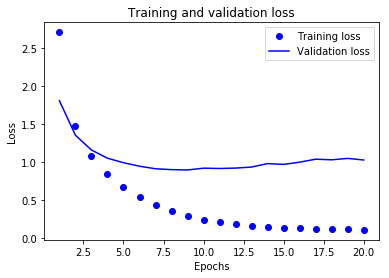

In [23]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

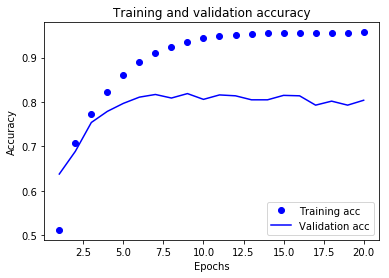

In [24]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [27]:
predictions = model.predict(X_test)
np.sum(predictions[0]), predictions.shape

(0.99999994, (2246, 46))

To experiment with a network setup:
* Try using larger or smaller layers.
* Try using single hidden layer, or three hidden layers.